MPS Available:  True


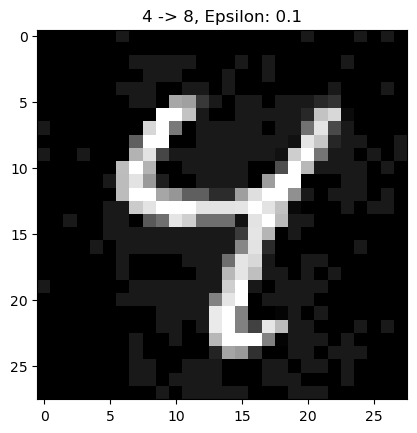

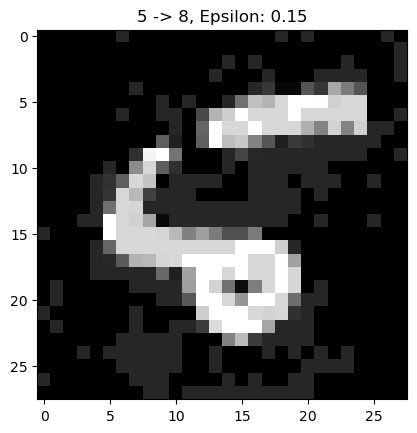

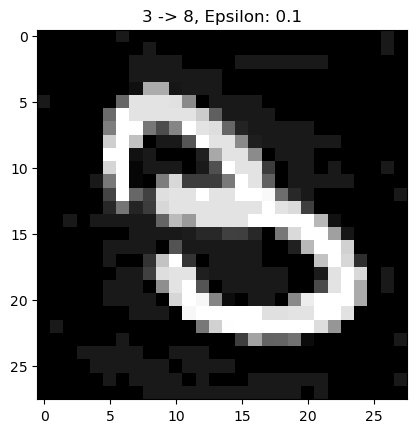

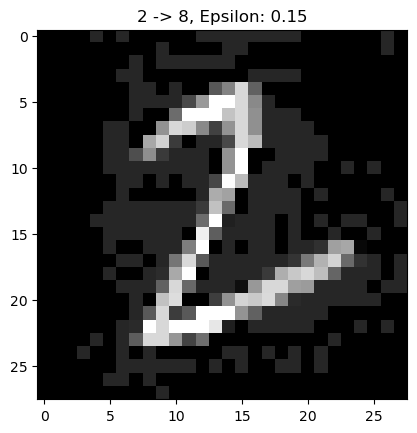

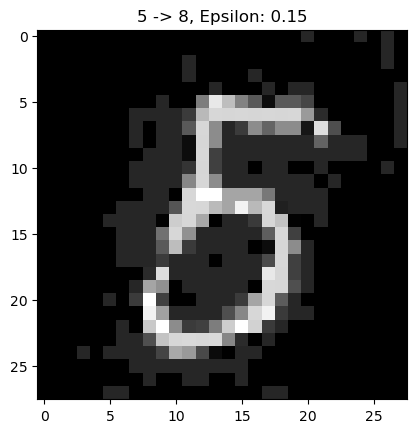

In [16]:
from AdversarialAttack import FGSMTargeted
from models.mnist_model import Net
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt


pretrained_model = "models/lenet_mnist_model.pth"
# use_cuda=True
use_mps = False
torch.manual_seed(42)

# MNIST Test dataset and dataloader declaration
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),])), batch_size=1)

# Define what device we are using
# print("CUDA Available: ",torch.cuda.is_available())
# device = torch.device("cuda" if use_cuda and torch.cuda.is_available() else "cpu")

print("MPS Available: ",torch.mps.is_available())
device = torch.device("mps" if use_mps and torch.mps.is_available() else "cpu")

# Initialize the network
model = Net().to(device)

# Load the pretrained model
model.load_state_dict(torch.load(pretrained_model, map_location=device, weights_only=True))

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()

target_class = 8

fgsm = FGSMTargeted(model, device)

# Apply the attack to first 50 sample images from the test dataset. Display the 5 perturbed images, their true labels and predicted classes and epsilons

for batch_idx, (data, label) in enumerate(test_loader):
    if batch_idx >= 50:
        break
    perturbed_data, attack_is_successful, adv_pred, attack_epsilon = fgsm.attack(data, target_class)
    if attack_is_successful:
        plt.imshow(perturbed_data.squeeze().detach().cpu().numpy(), cmap="gray")
        plt.title(f"{label.item()} -> {adv_pred.item()}, Epsilon: {attack_epsilon}")
        plt.show()
